In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from helper import *
import ssl
#Importation of all the packages
from datetime import datetime
import math
import json
import zipfile  
import ssl
from scipy import stats

#To dowload data
import requests
import io
import gzip

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

In [7]:
pageview_df = pd.read_csv("page_views_covid_related.csv.gz")
pageview_df_imp_country = pageview_df[["date"] + list(get_country_dict().values())].set_index('date')
pageview_df_imp_country.head()
country_dict = get_country_dict()

In [ ]:
#Normalisation different Mean/Max;Min; Correlation pageviews avec covid cases

#Population per country
#Population per languages


In [8]:
ssl._create_default_https_context = ssl._create_unverified_context
death_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_deaths.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
cases_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv?raw=true"

# Reading the downloaded content and turning it into a pandas dataframe
deaths = pd.read_csv(death_url,index_col=0)
cases = pd.read_csv(cases_url,index_col=0)
deaths= deaths.interpolate(method ='linear', limit_direction ='forward') 
cases = cases.interpolate(method ='linear', limit_direction ='forward') 
deaths = deaths.fillna(0)
cases = cases.fillna(0)
#Keep only values until July
deaths = deaths[deaths.index < '2020-08-31']
cases = cases[cases.index < '2020-08-31']


In [9]:
df_pageviews_pearson = pageview_df_imp_country.loc[pageview_df_imp_country.index < '2020-08-31']
df_pageviews_pearson = df_pageviews_pearson.loc[df_pageviews_pearson.index >= '2020-01-22']
df_pageviews_pearson = df_pageviews_pearson.interpolate(method ='linear', limit_direction ='forward') 
df_pageviews_pearson = df_pageviews_pearson.fillna(0)

In [14]:
pearson_deaths = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], deaths[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_deaths = pd.concat([pearson_deaths, output_df], axis=1)
pearson_deaths

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,7.649793e-01,-5.879579e-01,0.089888,-0.075668,-0.160419,0.189628,NaN,0.024396,3.650353e-01,...,-0.120604,4.765756e-01,0.069496,4.767521e-01,-0.258035,-0.241334,0.291979,0.214635,-0.163240,NaN
1,P-value:,6.430361e-44,4.933171e-22,0.182060,0.261574,0.016748,0.004579,NaN,0.717731,2.109927e-08,...,0.072913,5.466895e-14,0.302601,5.335652e-14,0.000101,0.000284,0.000010,0.001293,0.014898,NaN


In [15]:
pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], cases[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_cases = pd.concat([pearson_cases, output_df], axis=1)
pearson_cases

,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,8.405926e-01,-5.115834e-01,0.004844,-0.084170,-0.147660,3.314176e-01,0.249994,-0.024175,0.090575,...,-0.202300,-0.078737,0.083035,4.956838e-01,-4.192132e-01,-0.254933,4.181667e-01,5.312515e-01,-0.135019,0.006728
1,P-value:,1.683168e-60,3.314676e-16,0.942788,0.211578,0.027825,4.333591e-07,0.000167,0.720177,0.178728,...,0.002457,0.242669,0.217823,3.621734e-15,7.347582e-11,0.000123,8.278287e-11,1.440780e-17,0.044475,0.920593


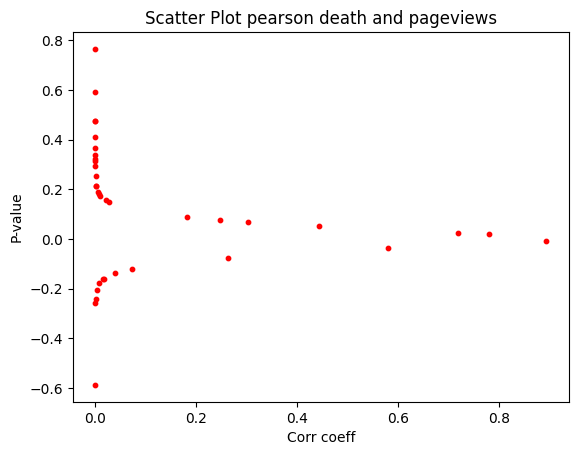

In [22]:
# create a new figure
plt.figure()

# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(pearson_deaths.loc[1][1:], pearson_deaths.loc[0][1:], color="red", s=10)

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Corr coeff")
plt.ylabel("P-value")

# show the plot
plt.show()

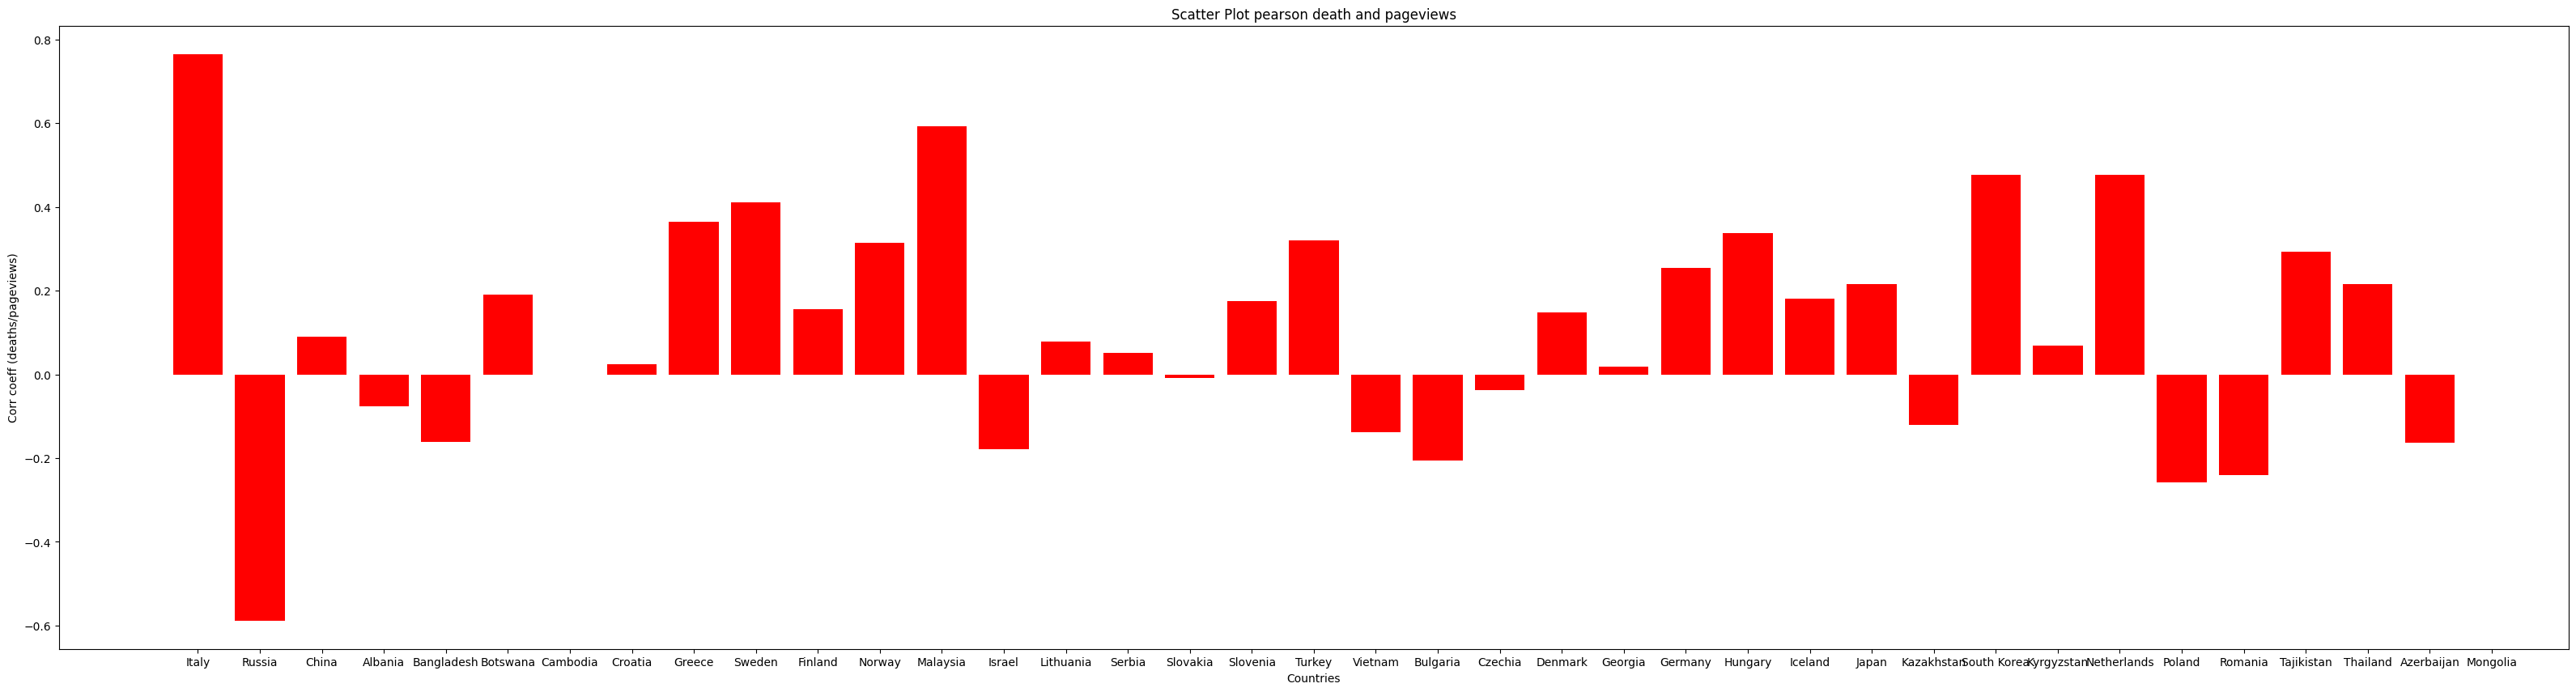

In [90]:
pearson_deathsT = pearson_deaths.transpose()
pearson_deathsT = pearson_deathsT.drop(index= 'Pearson correlation', axis=0)
pearson_deathsT = pearson_deathsT.rename(columns= {0: 'Correlation coefficient', 1: 'P-value'})
# create a new figure
plt.figure(figsize=(40, 10))

# use the scatter() function to plot the points,
# with red circles of size 10
plt.bar(pearson_deathsT.index.values, pearson_deathsT['Correlation coefficient'].values, color="red")

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Countries")
plt.ylabel("Corr coeff (deaths/pageviews)")

# show the plot
plt.show()

### Loading population by countries

In [94]:
population_df = pd.read_csv("Population_countries.csv")
population_df.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 67


### Feature selection for mobility

In [76]:
data_folder = 'data_2/'

#Download mobility and intervention files
google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')
interventions = pd.read_csv(data_folder+'interventions.csv.zip')

#Download file with covid pageviews #MODIFY WITH THE NEW DATA
file = gzip.open(data_folder+'aggregated_timeseries.json.gz')
data = json.load(file)

/var/folders/n2/lkxf5xgn5qd0l88pblwqxc6h0000gn/T/ipykernel_27246/3845124504.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')


In [77]:
#Change name of the columns
names = ["Retail and Recreations", "Grocery and Pharmacy", "Parks","Transit stations", "Workplace", "Residential"]
google_mobility = google_mobility.rename(dict(zip(google_mobility.columns[8:],names)), axis = 1)

#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])

#Delete columns about region
google_mobility = google_mobility.drop(google_mobility.iloc[:,2:7], axis = 1)

#Keep same dates as for corona wikipedia pages
google_mobility = google_mobility.loc[(google_mobility['date'] < "2020-08-01") & (google_mobility['date'] > "2020-01-21")]

#Regroup all data per country and per date and take the average
mobility = google_mobility.groupby(["country_region_code","country_region","date"]).mean()

google_mobility

,country_region_code,country_region,date,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
2111390,ZW,Zimbabwe,2020-07-27,NaN,NaN,NaN,NaN,-4.0,NaN
2111391,ZW,Zimbabwe,2020-07-28,NaN,NaN,NaN,NaN,0.0,NaN
2111392,ZW,Zimbabwe,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
2111393,ZW,Zimbabwe,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN


In [78]:
# Calculate total mobility 

google_mobility["total mobility average per day"] = google_mobility[['Retail and Recreations','Grocery and Pharmacy','Parks',\
     'Transit stations','Workplace' ,'Residential']].sum(axis=1).reset_index(drop=True) 
     

In [93]:
google_mobility.head(30)

,country_region_code,country_region,date,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential,total mobility average per day
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,12.0
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,13.0
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,9.0
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,7.0
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,4.0
5,AE,United Arab Emirates,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0,8.0
6,AE,United Arab Emirates,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0,5.0
7,AE,United Arab Emirates,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0,6.0
8,AE,United Arab Emirates,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0,9.0
9,AE,United Arab Emirates,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0,5.0


In [80]:
mean_mobility = google_mobility.groupby('country_region')["total mobility average per day"].mean()

In [92]:
mean_mobility.head(30)

country_region
Afghanistan               -99.943089
Angola                   -132.960432
Antigua and Barbuda       -69.117221
Argentina                -124.993833
Aruba                     -43.404762
Australia                 -48.773229
Austria                   -60.189060
Bahrain                   -38.494048
Bangladesh                -17.619048
Barbados                  -40.196588
Belarus                  -168.678571
Belgium                   -98.403486
Belize                   -120.163158
Benin                     -67.584386
Bolivia                   -59.214099
Bosnia and Herzegovina    -15.065476
Botswana                 -101.908347
Brazil                    -55.097080
Bulgaria                  -79.901680
Burkina Faso             -205.176312
Cambodia                  -37.591848
Cameroon                 -118.722744
Canada                    -85.648055
Cape Verde                -72.741456
Chile                     -90.853930
Colombia                  -87.023551
Costa Rica             

In [ ]:
mean_mobility()

In [95]:
# Plot moblity for the 40 countries 
mobility_countries= pd.DataFrame({"mobility":["mean mobility:"]})
for country in country_dict.items():
    output_df = pd.DataFrame({str(country[0]):[mean_mobility[str(country[0])]] })

KeyError: 'China'